# Happiness score prediction- A Regression problem

Life cycle process of ML

1. Define Libraries.Define the metrics for which the model is getting optimised

2. Data cleansing and Wrangling

3. Feature Engineering

4. Data Pre-processing

5. Feature Selection

6. Split Train and Test dataset

7. Model selection

8. Model validation

9. Interprit the result

## Defining Libraries & metrics to optimize model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


In [2]:
happy_df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/Happiness_dataset.csv")

In [3]:
happy_df.head().append(happy_df.tail())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


###### Encoding of certain features to replace categorical values with unique discrete variables

In [4]:
le= LabelEncoder()
cols=['Country','Region']
happy_df[cols]=happy_df[cols].apply(le.fit_transform)
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_df.shape

(158, 12)

In [6]:
happy_df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,26,8,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,53,8,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,141,8,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
happy_df['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [33]:
happy_df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,-3.091128,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.314570,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,-3.991066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,-3.289634,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,-3.124930,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,-2.950759,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,-1.988285,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Univariate Analysis

Country                             AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Region                           AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Happiness Rank                   AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Happiness Score                  AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Standard Error                   AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Family                           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.0945122x0.343182)
Freedom                             AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Trust (Government Corruption)       AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Generosity                          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Dystopia Residual                   AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtyp

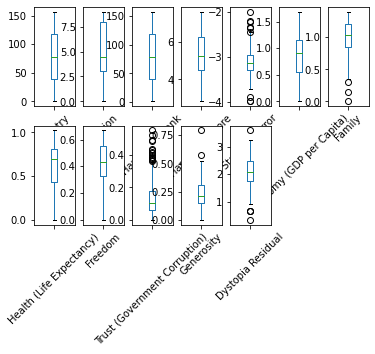

In [34]:
# First we will plot Boxplot to know whether the entire dataset as got any outliers
happy_df.plot(kind='box',subplots=True,layout=( 2,7),rot=45)

<AxesSubplot:>

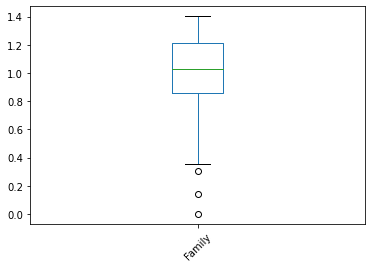

In [35]:
happy_df['Family'].plot(kind='box',rot=45)

<AxesSubplot:>

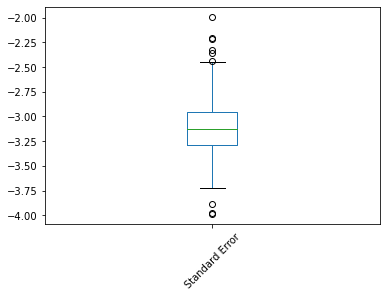

In [36]:
happy_df['Standard Error'].plot(kind='box',rot=45)

<AxesSubplot:>

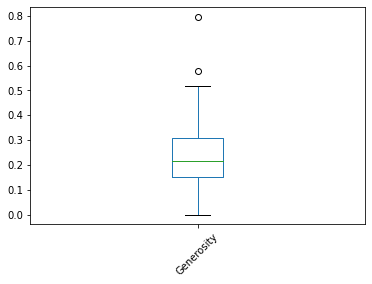

In [37]:


happy_df['Generosity'].plot(kind='box',rot=45)

<AxesSubplot:>

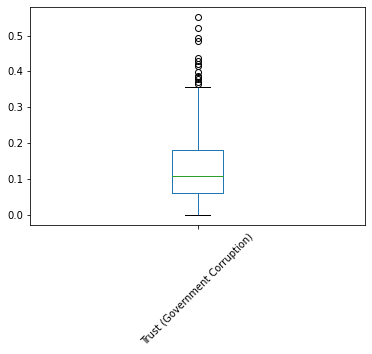

In [38]:
happy_df['Trust (Government Corruption)'].plot(kind='box',rot=45)

<AxesSubplot:>

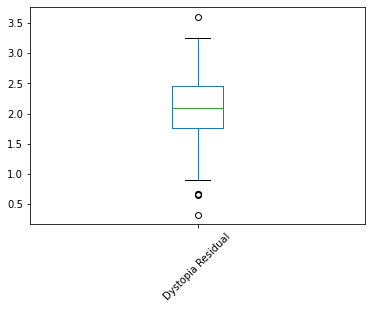

In [39]:
happy_df['Dystopia Residual'].plot(kind='box',rot=45)

###### By the above observations, we notice that the dataset got more number of outliers in the column Standard error and Trust

array([[<AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Happiness Rank'}>],
       [<AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>]], dtype=object)

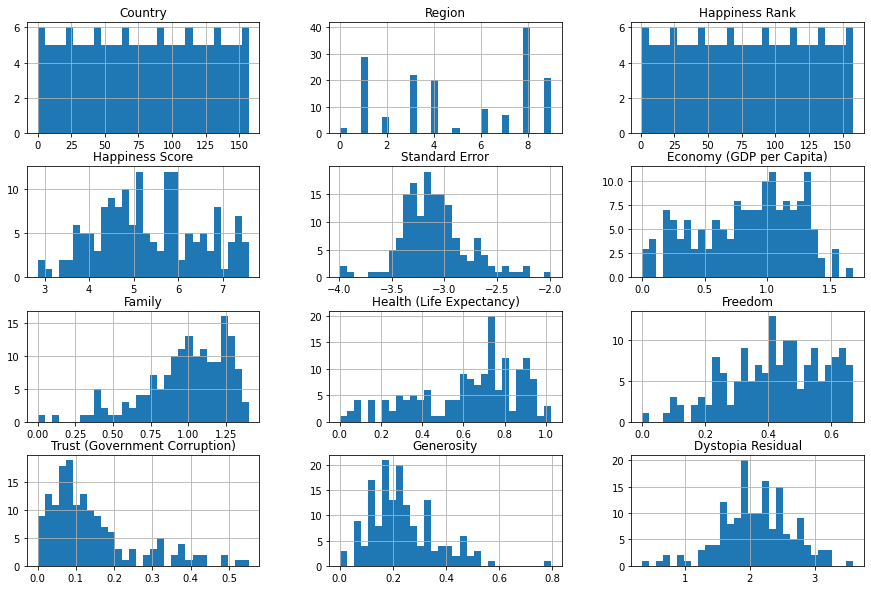

In [40]:
happy_df.hist(bins=30,figsize=(15,10))

###### Here the Region,Standard Error,Trust,Generosity are showing Skewness. But since Region is a categorical valued we dont try removing skewness from that.

<AxesSubplot:xlabel='Trust (Government Corruption)'>

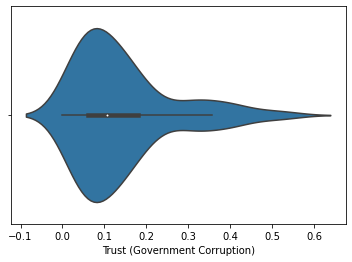

In [41]:
sns.violinplot(happy_df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Region'>

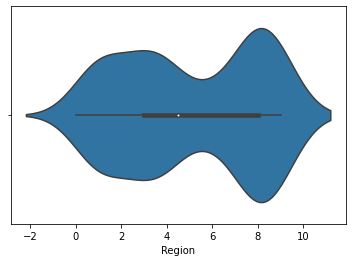

In [42]:
sns.violinplot(happy_df['Region'])

###### majority of the population in the dataset are from the region 8 ie, sub saharan africa and the lowest in the population is from south eastern asia

<AxesSubplot:xlabel='Standard Error'>

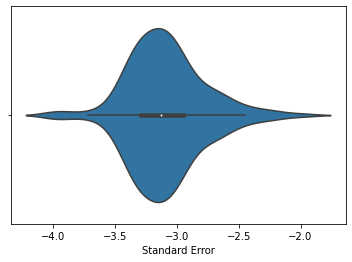

In [43]:
sns.violinplot(happy_df['Standard Error'])

<AxesSubplot:xlabel='Happiness Score'>

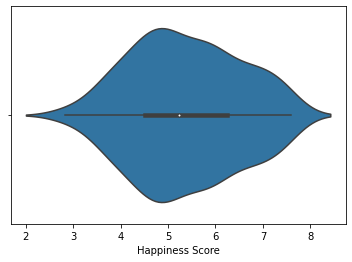

In [44]:
sns.violinplot(happy_df['Happiness Score'])

###### Most of the population in the dataset is having the happyness score somewhere near to 5

## Bivariate Analysis

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

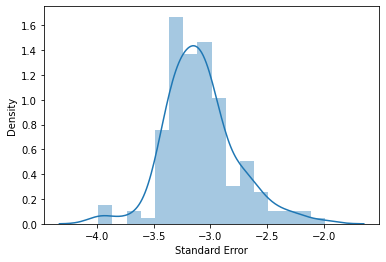

In [45]:
sns.distplot(happy_df['Standard Error'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

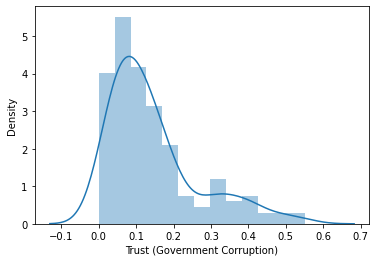

In [46]:
sns.distplot(happy_df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

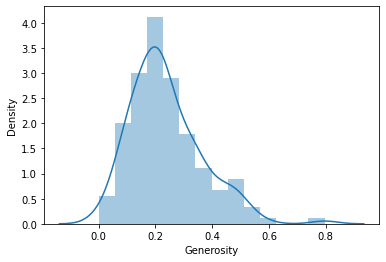

In [47]:
sns.distplot(happy_df['Generosity'])

###### There is less features which are skewed on one of the sides.So we have to normalize or remove skewness by using boxcox

In [48]:
happy_df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

##### Removing the skewness of the feature Standard Error

In [49]:
from scipy.stats import boxcox
happy_df['Standard Error']= boxcox(happy_df['Standard Error'],0)

ValueError: Data must be positive.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

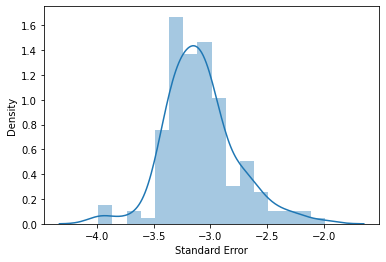

In [50]:
sns.distplot(happy_df['Standard Error'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

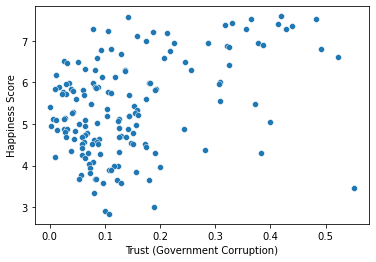

In [26]:
sns.scatterplot(x=happy_df['Trust (Government Corruption)'],y=happy_df['Happiness Score'])

###### As the Trust value is low,Happiness Score is also low and its increasing linearly with increase in Trust

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

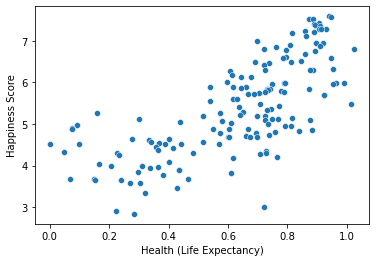

In [27]:
sns.scatterplot(x=happy_df['Health (Life Expectancy)'],y=happy_df['Happiness Score'])

###### As we can see that with better health,the happyness score is higher the same is not true for the poor health.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

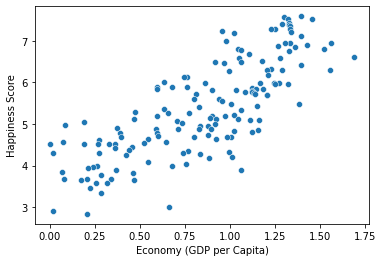

In [28]:
sns.scatterplot(x=happy_df['Economy (GDP per Capita)'],y=happy_df['Happiness Score'])

###### The graph shows clear picture of Happiness score which is linear.ie, as the Economy of the country increases the Happiness score will gradually increase.

## Multi-variate Analysis

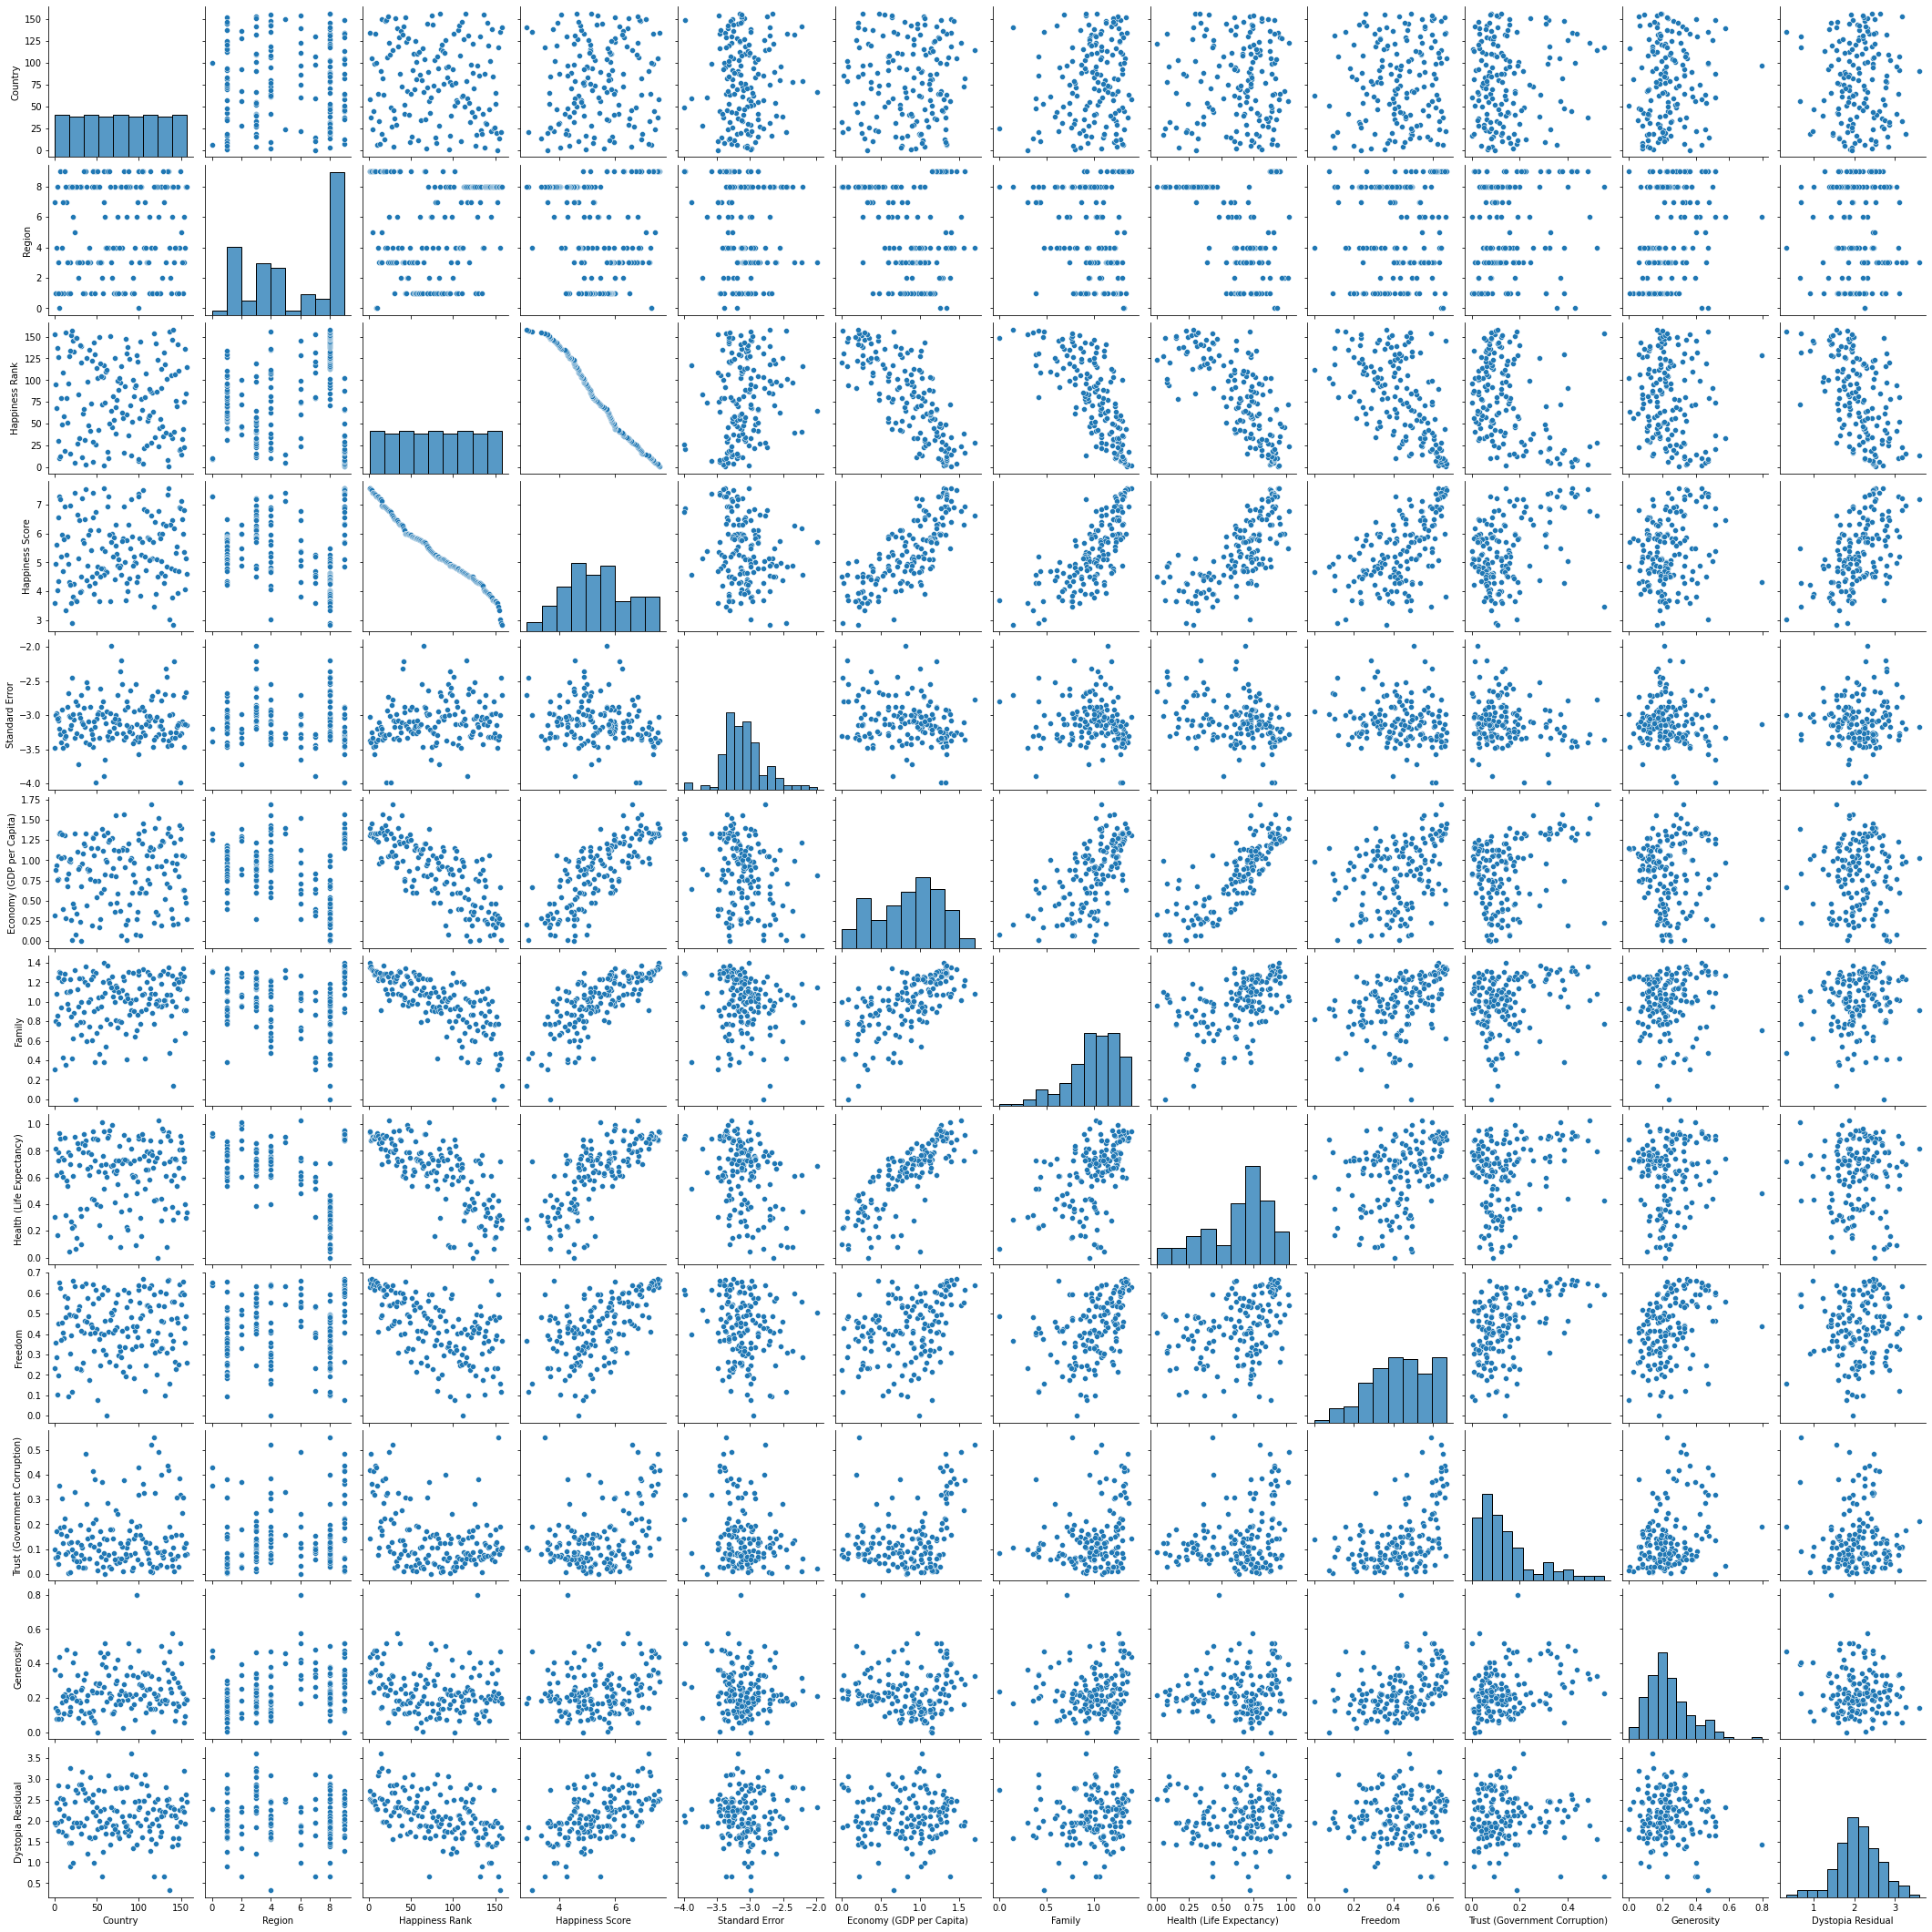

In [29]:
sns.pairplot(happy_df)

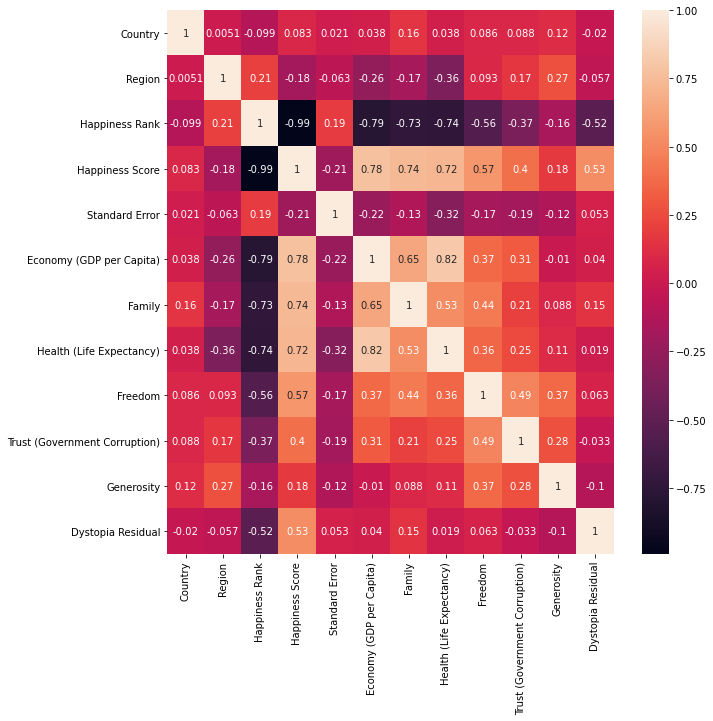

In [30]:
corr_hmap=happy_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

###### We have Hapiness Rank are negetively corelated with most of the features. so we will drop that column

In [205]:
happy_df.drop('Happiness Rank',axis=1,inplace=True)

###### Removing Outliers

In [206]:

from scipy.stats import zscore
z=np.abs(zscore(happy_df))
z

array([[1.23877001, 1.30025593, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [207]:
threshold=3
print(np.where(z>3))

(array([ 27,  64, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  9,  5,  8, 10,  5], dtype=int64))


In [208]:
z[157][5]

3.1347248549706186

In [209]:
df_happy=happy_df[(z<3).all(axis=1)]
df_happy.shape

(151, 11)

###### We have lost approximately around 7 rows which are lying outside the 3 standard deviation

Country                             AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Region                           AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Happiness Score                  AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Standard Error                   AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Family                           AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Health (Life Expectancy)         AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.0945122x0.343182)
Trust (Government Corruption)       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Generosity                          AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Dystopia Residual                   AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

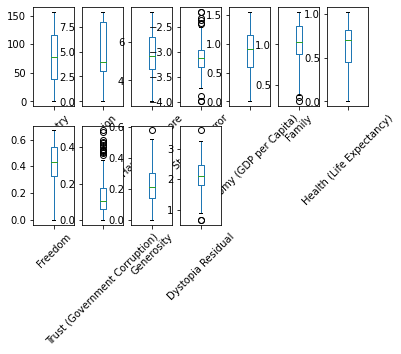

In [210]:
df_happy.plot(kind='box',subplots=True,layout=( 2,7),rot=45)

In [211]:
X=df_happy.drop('Happiness Score',axis=1)

In [212]:
Y=df_happy['Happiness Score']

In [213]:
Y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [217]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

In [219]:
lm=LinearRegression()

In [221]:
lm.fit(x_train,y_train)

LinearRegression()

In [222]:
predict_hpy=lm.predict(x_test)

In [223]:
predict_hpy

array([5.25292452, 6.93729654, 5.12874782, 5.14046024, 3.68075131,
       6.47678956, 5.19361206, 5.68856712, 5.82822113, 5.10144082,
       5.98362055, 7.19977179, 6.29806837, 7.28422993, 6.90136485,
       3.93071077, 4.56467547, 3.65520104, 5.82401725, 4.03317031,
       6.50509731, 5.12306062, 6.66967761, 4.07670044, 4.35006133,
       3.78069398, 4.63342678, 5.54829124, 4.86715297, 6.48505056,
       6.81006733, 6.98263815, 4.33237384, 7.22566969, 4.29238291,
       5.87828797, 5.58863796, 6.57492556, 4.71470097, 7.42697931,
       6.45453215, 6.00279002, 3.66730847, 3.34009499, 6.94616439,
       7.27760576])

In [224]:
lm.score(x_train,y_train)

0.9999999320774235

In [225]:
lm.coef_

array([-1.20827489e-06, -2.49305236e-05, -5.35223122e-05,  1.00023633e+00,
        1.00000412e+00,  9.99428916e-01,  9.99781418e-01,  1.00028921e+00,
        1.00012200e+00,  9.99979542e-01])

In [226]:
lm.intercept_

0.0002499484766191884

In [227]:
print("Predicted happyness score:",predict_hpy)
print("Actual happyness score:",y_test)

Predicted happyness score: [5.25292452 6.93729654 5.12874782 5.14046024 3.68075131 6.47678956
 5.19361206 5.68856712 5.82822113 5.10144082 5.98362055 7.19977179
 6.29806837 7.28422993 6.90136485 3.93071077 4.56467547 3.65520104
 5.82401725 4.03317031 6.50509731 5.12306062 6.66967761 4.07670044
 4.35006133 3.78069398 4.63342678 5.54829124 4.86715297 6.48505056
 6.81006733 6.98263815 4.33237384 7.22566969 4.29238291 5.87828797
 5.58863796 6.57492556 4.71470097 7.42697931 6.45453215 6.00279002
 3.66730847 3.34009499 6.94616439 7.27760576]
Actual happyness score: 78     5.253
18     6.937
84     5.129
83     5.140
146    3.681
32     6.477
80     5.194
66     5.689
56     5.828
87     5.102
46     5.984
12     7.200
37     6.298
9      7.284
19     6.901
140    3.931
116    4.565
150    3.655
57     5.824
136    4.033
30     6.505
86     5.123
26     6.670
135    4.077
126    4.350
145    3.781
113    4.633
69     5.548
100    4.867
31     6.485
22     6.810
15     6.983
127    4.332
11   

In [228]:
print("Mean absolute error-",mean_absolute_error(predict_hpy,y_test))

Mean absolute error- 0.0002540643560796592


In [229]:
print("Mean squared error-",mean_squared_error(predict_hpy,y_test))

Mean squared error- 8.276374516099739e-08


In [230]:
t=np.array([141,8,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726])

In [231]:
t.shape

(10,)

In [232]:
t=t.reshape(1,-1)

In [242]:
pred_test=lm.predict(t)

In [234]:
print(r2_score(y_test,predict_hpy))

0.9999999419172021


In [246]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9999999437712374
At random state 0,the testing accuracy is:- 0.9999998923919169


At random state 1,the training accuracy is:- 0.9999999427557161
At random state 1,the testing accuracy is:- 0.9999999058458616


At random state 2,the training accuracy is:- 0.9999999404640296
At random state 2,the testing accuracy is:- 0.9999999211982515


At random state 3,the training accuracy is:- 0.9999999420519903
At random state 3,the testing accuracy is:- 0.9999999171943108


At random state 4,the training accuracy is:- 0.9999999313671807
At random state 4,the testing accuracy is:- 0.9999999481823378


At random state 5,the training accuracy is:- 0.9999999418978074
At random state 5,the testing accuracy is:- 0.9999999160923009


At random state 6,the training accuracy is:- 0.9999999416788392
At random state 6,the testing accuracy is:- 0.9999999193995378


At random state 7,the training accuracy is:- 0.9999999447869043
At random state 7,the testing acc

At random state 82,the training accuracy is:- 0.999999940456997
At random state 82,the testing accuracy is:- 0.9999999292942874


At random state 83,the training accuracy is:- 0.9999999407494271
At random state 83,the testing accuracy is:- 0.9999999260557324


At random state 84,the training accuracy is:- 0.9999999399658658
At random state 84,the testing accuracy is:- 0.9999999269227761


At random state 85,the training accuracy is:- 0.9999999407496928
At random state 85,the testing accuracy is:- 0.9999999248805257


At random state 86,the training accuracy is:- 0.9999999368909276
At random state 86,the testing accuracy is:- 0.9999999436835575


At random state 87,the training accuracy is:- 0.9999999355359598
At random state 87,the testing accuracy is:- 0.9999999379821298


At random state 88,the training accuracy is:- 0.9999999447687765
At random state 88,the testing accuracy is:- 0.9999999015395635


At random state 89,the training accuracy is:- 0.9999999354930317
At random state 89,

## Cross Validation

In [247]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lm,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.999999662842538 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 3 the cv score is 0.9999994509935486 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 4 the cv score is 0.9999987608521019 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 5 the cv score is 0.9999979920686842 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 6 the cv score is 0.9999969900156517 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 7 the cv score is 0.9999954548527107 and accuracy score for training is 0.9999999410327308 and accuracy for the testing is 0.9999999255471331


At cross fold 8 the cv score is 0.9999950810050264 an

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=2 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training 
and testing score.

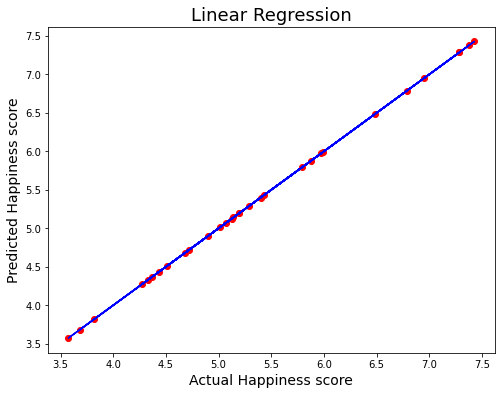

In [254]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## Regularization

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [257]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [264]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lsScore = r2_score(y_test,pred_ls)
lsScore

0.9999982709673181

In [265]:
cv_score=cross_val_score(ls,X,Y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.9998784138751964

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [279]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,X,Y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 90.38921018939598
Cross Val Score: -417.14660656729967


In [32]:
import pickle
filename = 'Happyness.pkl'
pickle.dump(ls, open(filename, 'wb'))

NameError: name 'ls' is not defined

In [292]:
loaded_model = pickle.load(open('Happyness.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.99999255471332


In [293]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [294]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Predicted,3.819313,7.28621,5.286491,4.435514,7.427021,5.01306,5.193678,4.677329,6.786251,5.428692,...,5.878381,5.975293,5.192398,4.514353,7.378075,5.995125,3.574655,5.79066,4.714768,6.485112
Original,3.819000,7.28600,5.286000,4.436000,7.427000,5.01300,5.194000,4.677000,6.786000,5.429000,...,5.878000,5.975000,5.192000,4.514000,7.378000,5.995000,3.575000,5.79100,4.715000,6.485000
